# Setup

## Import dependencies

In [1]:
import pandas as pd
import csv
import datetime
from matplotlib import pyplot as plt
import seaborn as sns

## Set file locations

In [2]:
# file locations for import
# raw_data_file = "../00_data/raw_data/a70414_finishers.csv" # 2007 Brooklyn Half
# raw_data_file = "../00_data/raw_data/19nyc60_finishers.csv" # 2019 NYC 60K
# raw_data_file = "../00_data/raw_data/20WH5K_finishers.csv" # 2020 Washington Heights 5K
raw_data_file = "../00_data/geodata/19nyc60_finishers_geocoded.csv" # 2019 NYC 60K with geocoding
# raw_data_file = "../00_data/geodata/M2019_finishers_geocoded.csv" # 2019 NYC Marathon with geocoding

# file locations for export

# Import data

## Import data from csv

In [3]:
df = pd.read_csv(raw_data_file)

In [4]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   375 non-null    object 
 1   geo_subregion          375 non-null    object 
 2   country                375 non-null    object 
 3   gender                 375 non-null    object 
 4   age                    375 non-null    int64  
 5   bib                    375 non-null    int64  
 6   team                   183 non-null    object 
 7   official_time          375 non-null    object 
 8   pace_per_mile          375 non-null    object 
 9   place_overall          375 non-null    int64  
 10  place_gender           375 non-null    int64  
 11  age_group              375 non-null    object 
 12  place_age-group        375 non-null    int64  
 13  country_group          375 non-null    object 
 14  place_country          375 non-null    int64  
 15  place_

In [5]:
if df.columns[0] == 'Unnamed: 0':
    df = df.drop(df.columns[0], axis=1)

In [6]:
df['official_time'] = pd.to_timedelta(df['official_time'])
df['pace_per_mile'] = pd.to_timedelta('00:' + df['pace_per_mile'].astype(str))
df['affiliated'] = df['team'].notnull()

In [7]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   name                   375 non-null    object         
 1   geo_subregion          375 non-null    object         
 2   country                375 non-null    object         
 3   gender                 375 non-null    object         
 4   age                    375 non-null    int64          
 5   bib                    375 non-null    int64          
 6   team                   183 non-null    object         
 7   official_time          375 non-null    timedelta64[ns]
 8   pace_per_mile          375 non-null    timedelta64[ns]
 9   place_overall          375 non-null    int64          
 10  place_gender           375 non-null    int64          
 11  age_group              375 non-null    object         
 12  place_age-group        375 non-null    int64      

In [8]:
df.head()

,name,geo_subregion,country,gender,age,bib,team,official_time,pace_per_mile,place_overall,...,percentage_age‐graded,net_time,net_place,long_country,address,full_address,location,latitude,longitude,affiliated
0,Bobby Asher,"Bronx, NY",USA,M,34,275,Van Cortlandt TC,0 days 05:21:44,0 days 00:08:38,29,...,0%,5:21:44,29,United States,"Bronx, NY United States","The Bronx, Bronx County, New York, United States","(40.8466508, -73.8785937)",40.846651,-73.878594,True
1,Manuel Romero,"New York, NY",USA,M,48,292,Front Runners NY,0 days 05:58:35,0 days 00:09:38,75,...,0%,5:58:35,75,United States,"New York, NY United States","New York, United States","(40.7127281, -74.0060152)",40.712728,-74.006015,True
2,Pierre Rousseau,Montreal,CAN,M,56,53,NaN,0 days 05:26:59,0 days 00:08:47,35,...,0%,5:26:59,35,Canada,Montreal Canada,"Montréal, Agglomération de Montréal, Montréal ...","(45.4972159, -73.6103642)",45.497216,-73.610364,False
3,Deborah McDuffie-Saat,"New York, NY",USA,F,61,369,New York Flyers,0 days 07:49:42,0 days 00:12:36,265,...,0%,7:49:42,265,United States,"New York, NY United States","New York, United States","(40.7127281, -74.0060152)",40.712728,-74.006015,True
4,Robert Wilson,"Bronx, NY",USA,M,41,282,NaN,0 days 06:09:54,0 days 00:09:56,86,...,0%,6:09:54,86,United States,"Bronx, NY United States","The Bronx, Bronx County, New York, United States","(40.8466508, -73.8785937)",40.846651,-73.878594,False


In [9]:
df.describe()

,age,bib,official_time,pace_per_mile,place_overall,place_gender,place_age-group,place_country,place_age‐graded,net_place,latitude,longitude
count,375.000000,375.000000,375,375,375.000000,375.000000,375.000000,375.000000,375.0,375.000000,374.000000,374.000000
mean,41.826667,252.490667,0 days 07:09:45.413333333,0 days 00:11:32.088000,188.000000,105.344000,15.330667,120.901333,0.0,188.000000,40.340645,-73.580829
std,10.204819,149.391204,0 days 01:21:40.535746367,0 days 00:02:11.457401408,108.397417,69.997987,11.826395,97.623189,0.0,108.397417,4.756100,10.178162
min,20.000000,1.000000,0 days 04:04:29,0 days 00:06:34,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,-22.905560,-122.391675
25%,34.000000,125.000000,0 days 06:13:53,0 days 00:10:02,94.500000,47.500000,5.000000,19.500000,0.0,94.500000,40.650104,-74.006946
50%,41.000000,244.000000,0 days 07:02:22,0 days 00:11:20,188.000000,94.000000,12.000000,113.000000,0.0,188.000000,40.712728,-73.959894
75%,48.000000,364.500000,0 days 07:56:58.500000,0 days 00:12:48,281.500000,158.500000,23.000000,206.500000,0.0,281.500000,40.789624,-73.900414
max,71.000000,532.000000,0 days 11:06:10,0 days 00:17:53,375.000000,252.000000,47.000000,300.000000,0.0,375.000000,53.522768,13.388860


# Single variables

## Age
(discrete variable)

In [10]:
sns.set_style('whitegrid')

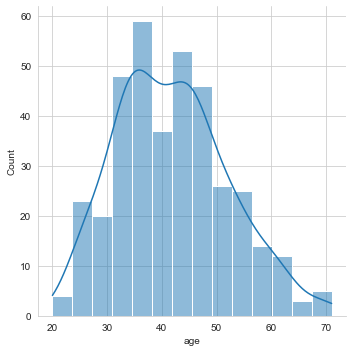

In [11]:
# Take a look at the runners' ages.
sns.displot(data=df, x='age', kde=True);

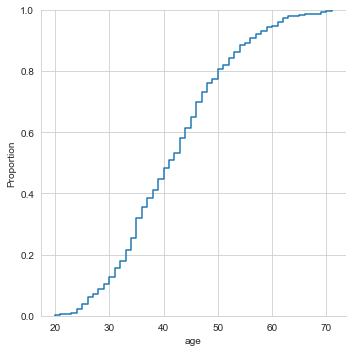

In [12]:
sns.displot(data=df, x='age', kind='ecdf');

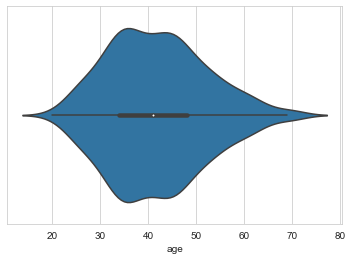

In [13]:
sns.violinplot(data=df, x='age');

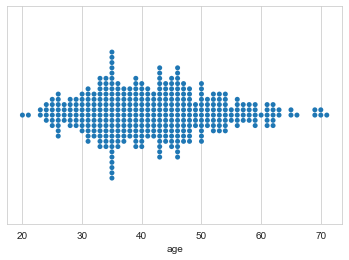

In [14]:
sns.swarmplot(data=df, x='age');

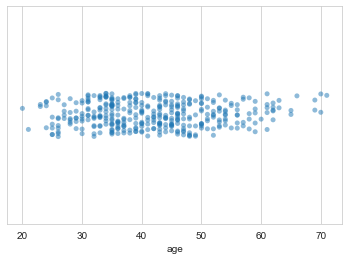

In [15]:
sns.stripplot(data=df, x='age', alpha=0.5);

## Gender
(categorical variable)

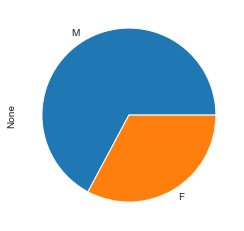

In [16]:
# Gender distribution?
gender_counts = pd.value_counts(df['gender'].values, sort=True)
gender_counts.plot.pie();

## Pace
(continuous variable)

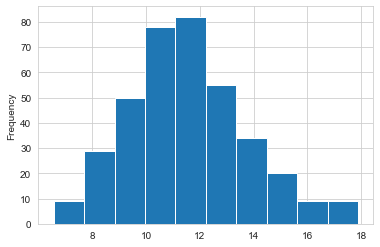

In [17]:
# How fast were they running?
(df['pace_per_mile'].astype('timedelta64[s]')/60).plot.hist();

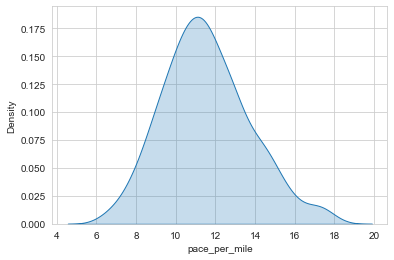

In [18]:
sns.kdeplot(df['pace_per_mile'].astype('timedelta64[s]')/60, shade=True);

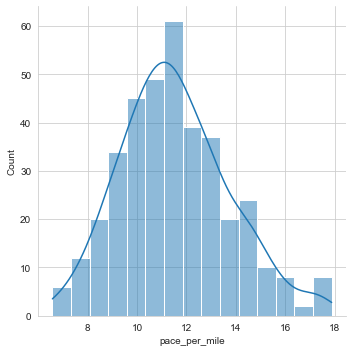

In [19]:
sns.displot(data=df, x=df['pace_per_mile'].astype('timedelta64[s]')/60, kde=True);

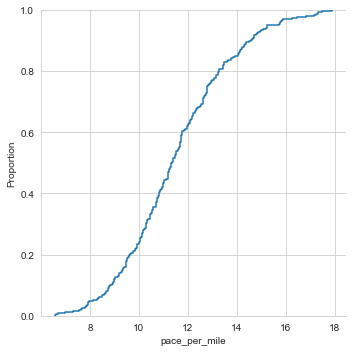

In [20]:
sns.displot(data=df, x=df['pace_per_mile'].astype('timedelta64[s]')/60, kind='ecdf');

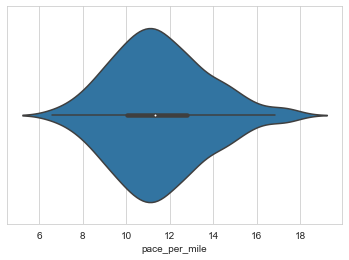

In [21]:
sns.violinplot(data=df, x=df['pace_per_mile'].astype('timedelta64[s]')/60);

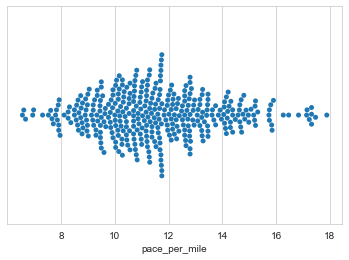

In [22]:
sns.swarmplot(data=df, x=df['pace_per_mile'].astype('timedelta64[s]')/60);

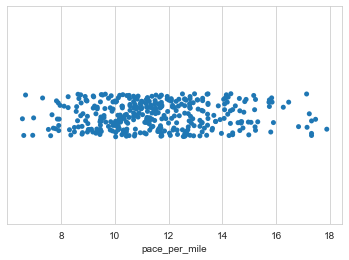

In [23]:
sns.stripplot(data=df, x=df['pace_per_mile'].astype('timedelta64[s]')/60);

## Country
(categorical variable)

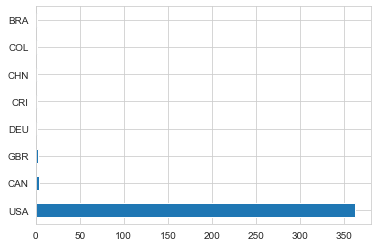

In [24]:
# What countries do the runners live in?
country_counts = pd.value_counts(df['country'].values, sort=True)
country_counts.plot.barh();

# Two variables

## Age & Gender
(discrete and categorical)

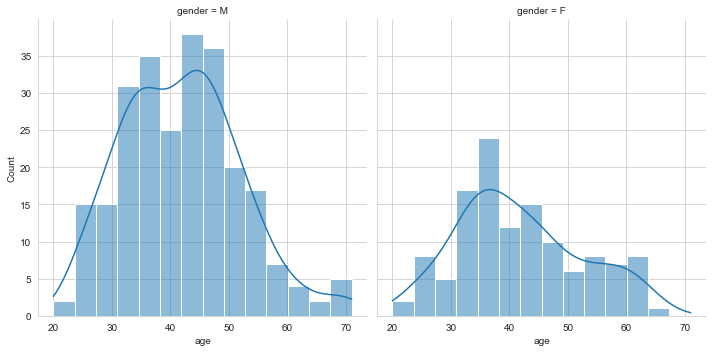

In [25]:
sns.displot(data=df, x='age', col='gender', kde=True);

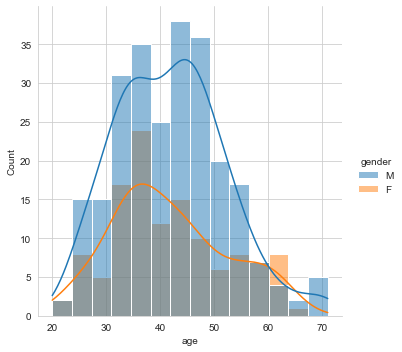

In [26]:
sns.displot(data=df, x='age', hue='gender', kde=True);

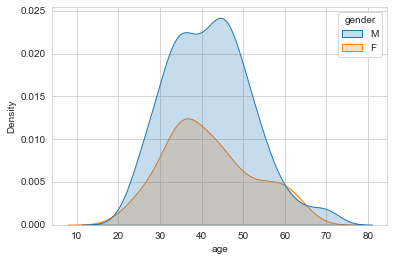

In [27]:
sns.kdeplot(df['age'], hue=df['gender'], shade=True);

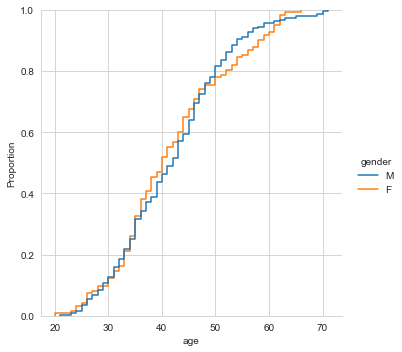

In [28]:
sns.displot(data=df, x='age', hue='gender', kind='ecdf');

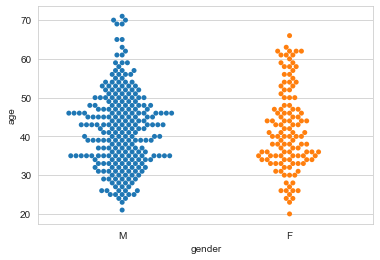

In [29]:
sns.swarmplot(data=df, x='gender', y='age');

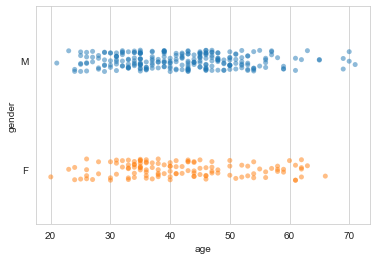

In [30]:
sns.stripplot(data=df, y='gender', x='age', alpha=0.5);

## Pace & Gender
(continuous and categorical)

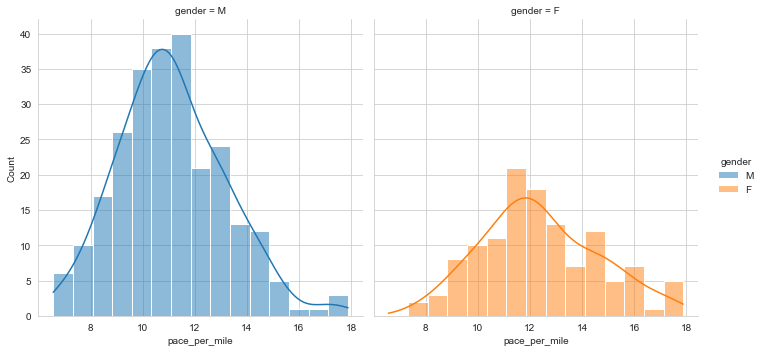

In [31]:
sns.displot(data=df, x=df['pace_per_mile'].astype('timedelta64[s]')/60, col='gender', hue='gender', kde=True);

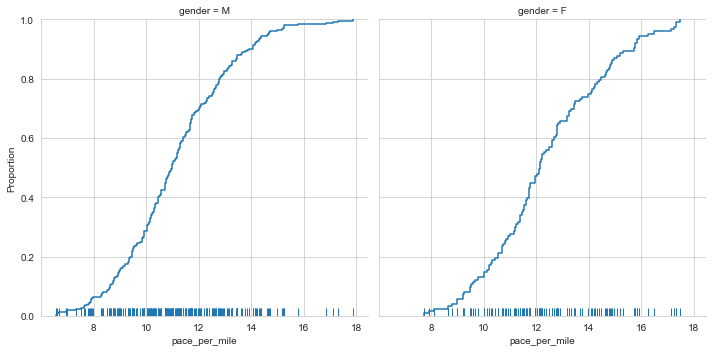

In [32]:
sns.displot(data=df, x=df['pace_per_mile'].astype('timedelta64[s]')/60, col='gender', kind='ecdf', rug=True);

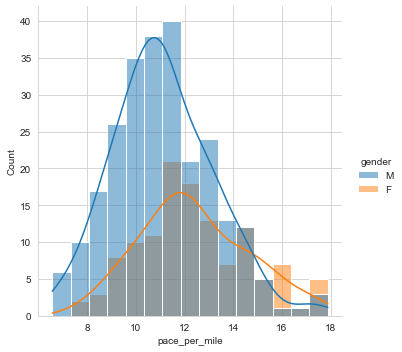

In [33]:
sns.displot(data=df, x=df['pace_per_mile'].astype('timedelta64[s]')/60, hue='gender', kde=True);

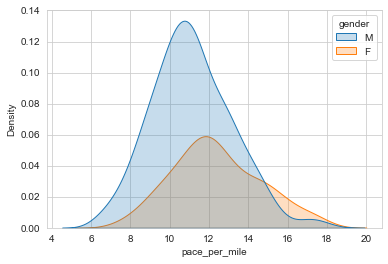

In [34]:
sns.kdeplot(df['pace_per_mile'].astype('timedelta64[s]')/60, hue=df['gender'], shade=True);

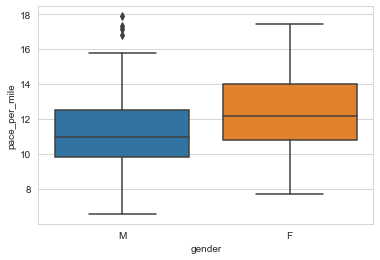

In [35]:
sns.boxplot(data=df, y=df['pace_per_mile'].astype('timedelta64[s]')/60, x='gender');

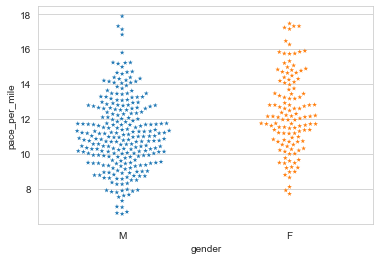

In [36]:
sns.swarmplot(data=df, x='gender', y=df['pace_per_mile'].astype('timedelta64[s]')/60, marker='*');

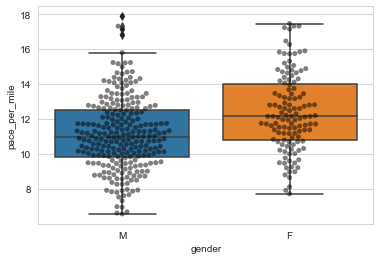

In [37]:
sns.boxplot(data=df, y=df['pace_per_mile'].astype('timedelta64[s]')/60, x='gender')
sns.swarmplot(data=df, x='gender', y=df['pace_per_mile'].astype('timedelta64[s]')/60,
             color='black', alpha=0.5);

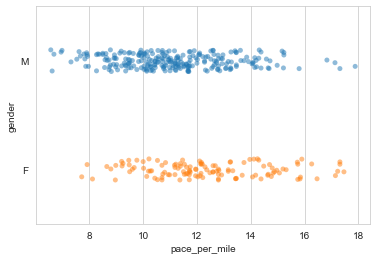

In [38]:
sns.stripplot(data=df, y='gender', x=df['pace_per_mile'].astype('timedelta64[s]')/60, alpha=0.5);

## Age & Pace
(discrete and continuous)

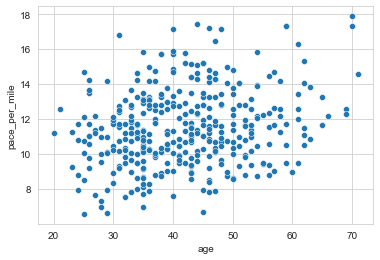

In [39]:
sns.scatterplot(data=df, y=df['pace_per_mile'].astype('timedelta64[s]')/60, x='age');

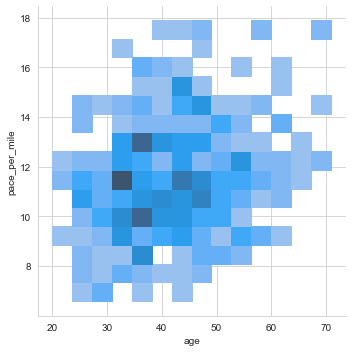

In [40]:
sns.displot(data=df, y=df['pace_per_mile'].astype('timedelta64[s]')/60, x='age');

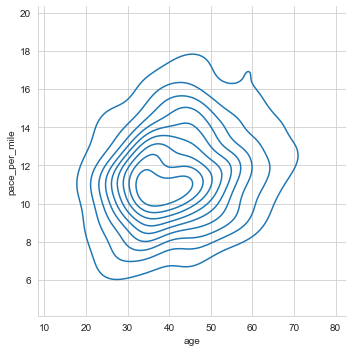

In [41]:
sns.displot(data=df, y=df['pace_per_mile'].astype('timedelta64[s]')/60, x='age', kind='kde');

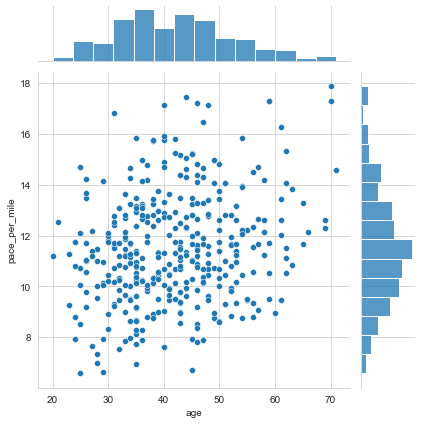

In [42]:
sns.jointplot(data=df, y=df['pace_per_mile'].astype('timedelta64[s]')/60, x='age');

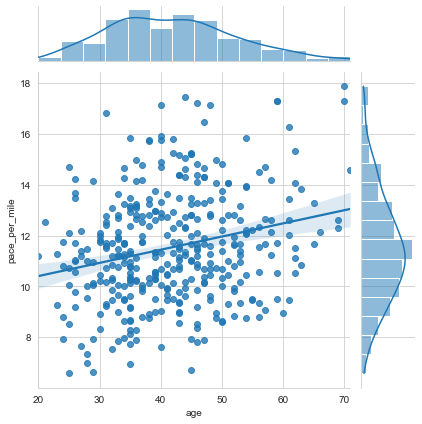

In [43]:
sns.jointplot(data=df, y=df['pace_per_mile'].astype('timedelta64[s]')/60, x='age', kind='reg');

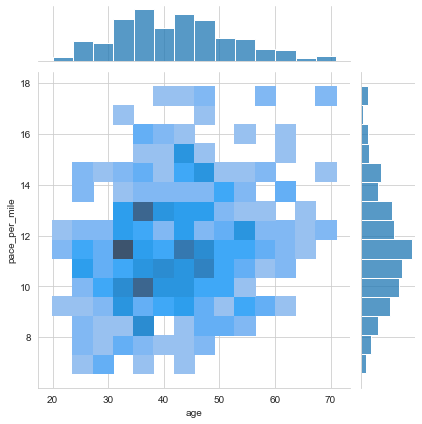

In [44]:
sns.jointplot(data=df, y=df['pace_per_mile'].astype('timedelta64[s]')/60, x='age', kind='hist');

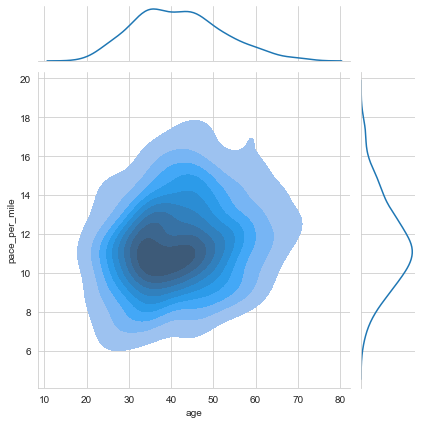

In [45]:
sns.jointplot(data=df, y=df['pace_per_mile'].astype('timedelta64[s]')/60, x='age', kind='kde', shade=True);

# Three variables

## Age, Gender, & Pace
(discrete, categorical, and continuous)

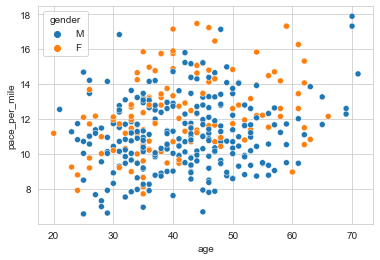

In [46]:
sns.scatterplot(data=df, y=df['pace_per_mile'].astype('timedelta64[s]')/60, x='age', hue='gender');

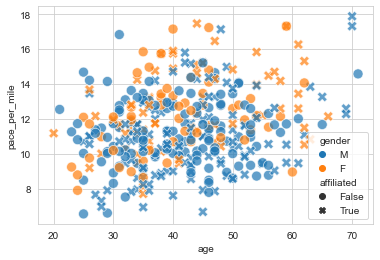

In [88]:
sns.scatterplot(data=df, y=df['pace_per_mile'].astype('timedelta64[s]')/60, x='age',
                hue='gender', 
               style='affiliated',
               s=100,
               alpha=0.7);

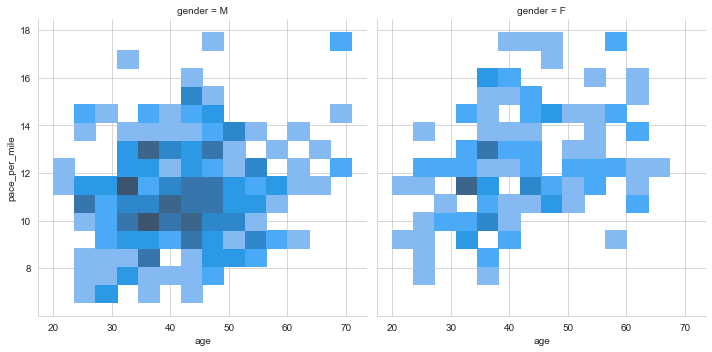

In [47]:
sns.displot(data=df, y=df['pace_per_mile'].astype('timedelta64[s]')/60, x='age', col='gender');

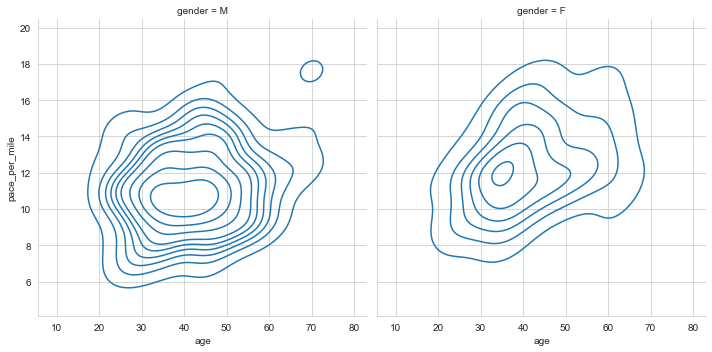

In [48]:
sns.displot(data=df, y=df['pace_per_mile'].astype('timedelta64[s]')/60, x='age', kind='kde', col='gender');

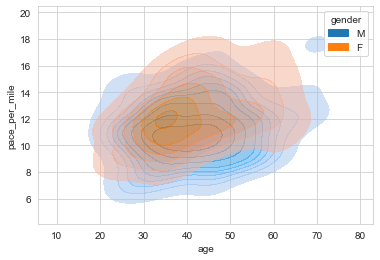

In [49]:
sns.kdeplot(x=df['age'], y=df['pace_per_mile'].astype('timedelta64[s]')/60, shade=True, hue=df['gender'], alpha=0.5);

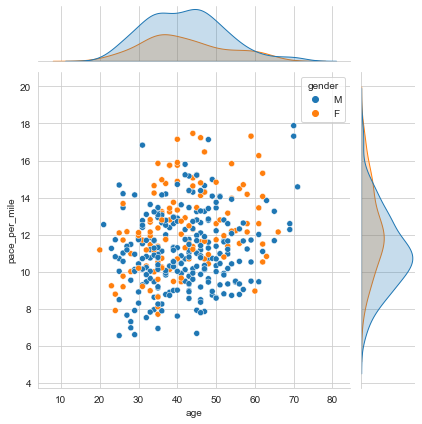

In [50]:
sns.jointplot(data=df, y=df['pace_per_mile'].astype('timedelta64[s]')/60, x='age', hue='gender');

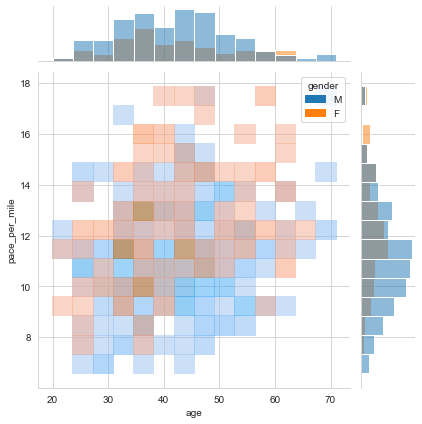

In [51]:
sns.jointplot(data=df, y=df['pace_per_mile'].astype('timedelta64[s]')/60, x='age', kind='hist', hue='gender', alpha=0.5);

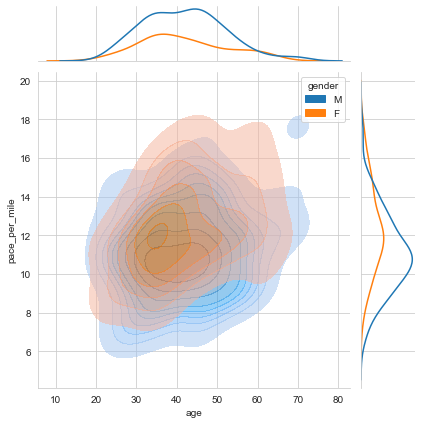

In [52]:
sns.jointplot(data=df, y=df['pace_per_mile'].astype('timedelta64[s]')/60, 
              x='age', kind='kde', shade=True, hue='gender', alpha=0.5);

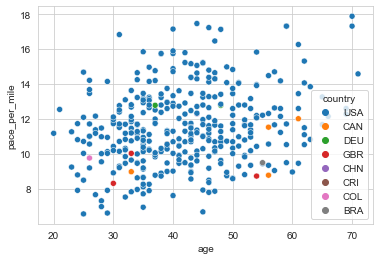

In [53]:
sns.scatterplot(data=df, y=df['pace_per_mile'].astype('timedelta64[s]')/60, x='age', hue='country');

## Age, Gender, & Affiliation
(disctrete, categorical, and categorical)

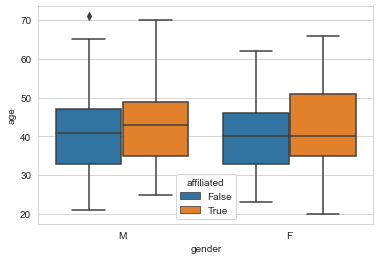

In [54]:
sns.boxplot(data=df, y='age', x='gender', hue='affiliated');

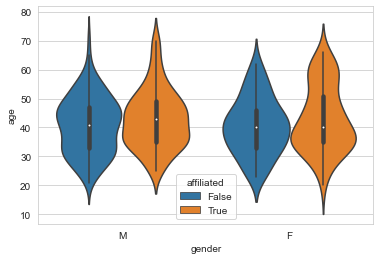

In [55]:
sns.violinplot(data=df, y='age', x='gender', hue='affiliated');

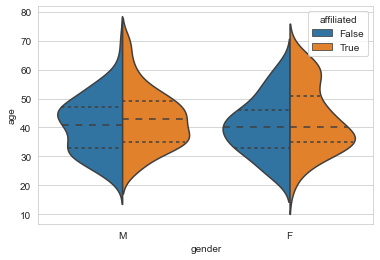

In [56]:
sns.violinplot(data=df, y='age', x='gender', hue='affiliated', split=True, inner='quartiles');

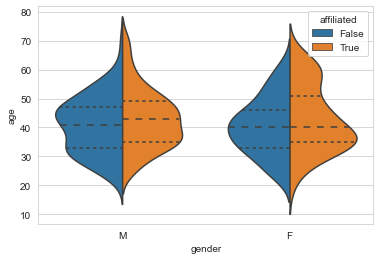

In [57]:
sns.violinplot(data=df, y='age', x='gender', hue='affiliated', split=True, inner='quartiles', scale='count');

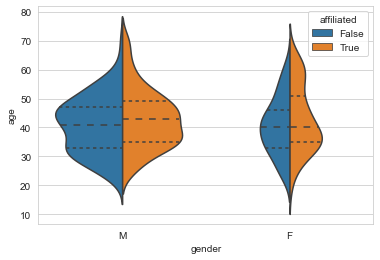

In [58]:
sns.violinplot(data=df, y='age', x='gender', hue='affiliated', split=True, inner='quartiles', 
               scale='count', scale_hue=False);

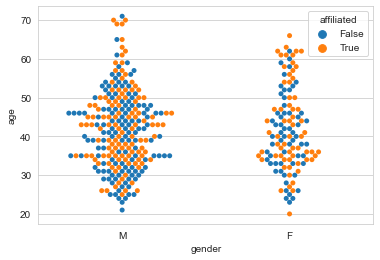

In [59]:
sns.swarmplot(data=df, x='gender', y='age', hue='affiliated');

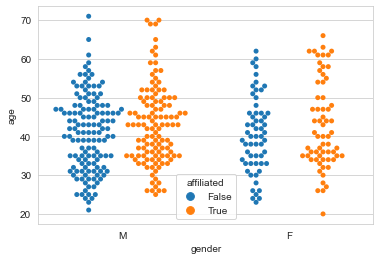

In [60]:
sns.swarmplot(data=df, x='gender', y='age', hue='affiliated', dodge=True);

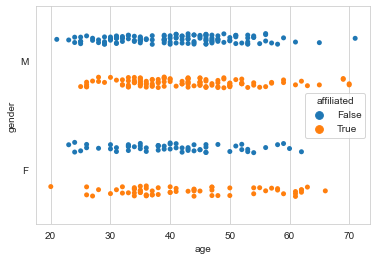

In [70]:
sns.stripplot(data=df, y='gender', x='age', hue='affiliated', dodge=True);

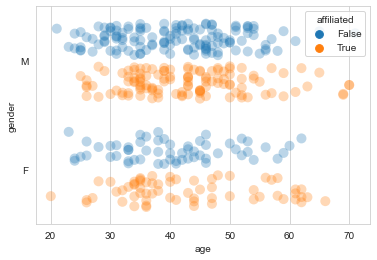

In [74]:
sns.stripplot(data=df, y='gender', x='age', hue='affiliated', dodge=True, 
             jitter=0.3,
             size=10,
             alpha=0.3);

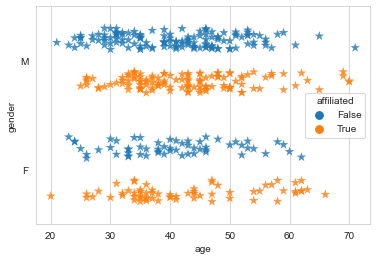

In [81]:
sns.stripplot(data=df, y='gender', x='age', hue='affiliated', dodge=True, 
             jitter=0.2,
             size=10,
             alpha=0.8,
             marker='*');

## Pace, Gender, & Affiliation
(continous, categorical, and categorical)

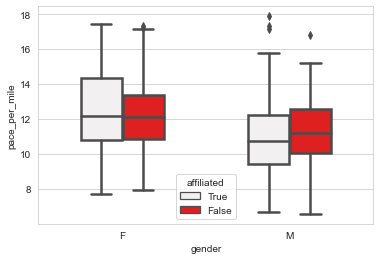

In [61]:
sns.boxplot(data=df, y=df['pace_per_mile'].astype('timedelta64[s]')/60, x='gender', hue='affiliated',
           order=['F', 'M'],
           hue_order=[True, False],
           color='r',
           width=0.5,
           linewidth=2.5);

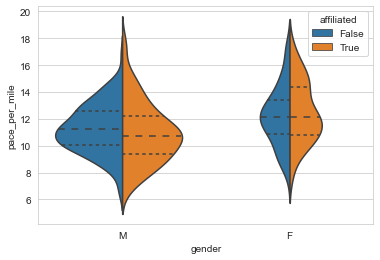

In [62]:
sns.violinplot(data=df, y=df['pace_per_mile'].astype('timedelta64[s]')/60, x='gender', 
               hue='affiliated', split=True, inner='quartiles', 
               scale='count', scale_hue=False);

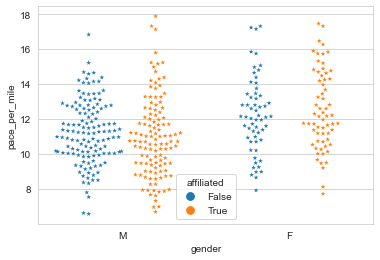

In [63]:
sns.swarmplot(data=df, x='gender', y=df['pace_per_mile'].astype('timedelta64[s]')/60, hue='affiliated', dodge=True,
             marker='*');

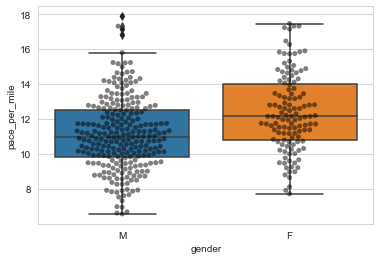

In [64]:
sns.boxplot(data=df, y=df['pace_per_mile'].astype('timedelta64[s]')/60, x='gender')
sns.swarmplot(data=df, x='gender', y=df['pace_per_mile'].astype('timedelta64[s]')/60,
             color='black', alpha=0.5);